# Tasks

#### **Task 6.1:**
Download the 'Tweets' dataset from Canvas. Classify the sentiments in the dataset using six classifiers and calculate all evaluation metrics.

NOTE: If the running time is too long, you can reduce the number of samples.

NOTE: You should comment on your code and explain what each part is doing

In [ ]:
#Install textblob and wordcloud
!pip install textblob --quiet
!pip install wordcloud --quiet

# Import useful libraries to be used

import pandas as pd
import numpy as np
import string
import nltk
import seaborn as sns
from textblob import TextBlob
import matplotlib.pyplot as plt
import plotly.express as px
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from nltk.corpus import stopwords

In [ ]:
# Read in the dataset and view the first few lines of data
tweets = pd.read_csv("/content/Tweets.csv")
tweets.head(4)

,sentiment,tweet
0,0,Eating a gyro for breakfast at the airport. Pr...
1,1,Well .. .you fall of the 'horse' and get strai...
2,0,thanks for the responses but when is it really...
3,0,depressed.! fuuck my life!


In [ ]:
# See the shape of the data columns and rows

tweets.shape

(40000, 2)

In [ ]:
# The analysis took too long to run at first. Reduce sample size and reset the index of the sample

tweets = tweets.sample(n=20000, random_state = 48)
tweets.reset_index(drop=True, inplace=True)

## Text Cleaning

In [ ]:
# Drop null values row-wise and save output by assigning True to the inplace argument.

tweets.dropna(inplace=True, axis=0)

In [ ]:
# Convert all the tweets to lower cases by using and defining a lambda function.

tweets['tweet'] = tweets['tweet'].apply(lambda x: x.lower())

In [ ]:
# Remove all punctuations such as '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~' using the string module in python.
# The punctuations are removed by applying a lambda function on the tweet column. The function takes a string x representing the tweet,
# and creates a new string i by joining characters from x only if the  x is not in the string.punctuation model.

tweets['tweet'] = tweets['tweet'].apply(lambda x: ''.join(i for i in x if i not in string.punctuation))

# Print the punctuations removed from the tweet using Python string.punctuation module
print("\nPunctions that was removed from the tweet are: ", string.punctuation)


Punctions that was removed from the tweet are:  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
# Inspect the first few rows of data to ensure they are clear of any punctuations

tweets.head(3)

,sentiment,tweet
0,1,brad fastings is my favorite person to hang ou...
1,0,its not what you said its how you said it
2,1,russell invited me to drayton manor on tuesday...


In [ ]:
# Remove noise from the dataset by removing stop words.
# Download stopwords from the nltk package
nltk.download('stopwords')

# Get all stop words from the stopword module and store them in a variable "stopwords_tweet"
stopwords_tweet = stopwords.words('english')

# Using the lambda inline function, remove all stopwords in the tweet column. The function takes a string x representing the tweet,
# splits the tweets into words using the .split() method, iterates through the words and keeps only words not present in stopwords_tweet

tweets['tweet'] = tweets['tweet'].apply(lambda x: " ".join(i for i in x.split() if i not in stopwords_tweet))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Stem words to their root words

stemmer = PorterStemmer()
tweets['tweet'] = tweets['tweet'].apply(lambda x:" ".join([stemmer.stem(word) for word in x.split()]))

## Sentiment Analysis

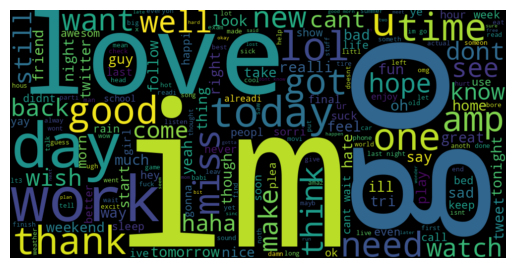

In [ ]:
# Generate a general word cloud for the most frequent words in the tweets dataset. Create a list of words by iterating through the tweets,
# split the words and insert only words that are not stop words into the list. Generate a word cloud from the list of words generated.

words = []
for i in tweets['tweet']:
    words.extend([word for word in i.split() if word not in STOPWORDS])

wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Create a dataframe for negative and positive tweets by filtering positive and negative sentiments from the tweets dataset,
# assign all sentiment values equal to 1 to positive tweets and all sentiments less than 1 to negative tweets.

positive_tweets = tweets[tweets['sentiment'] == 1]
negative_tweets = tweets[tweets['sentiment'] < 1]

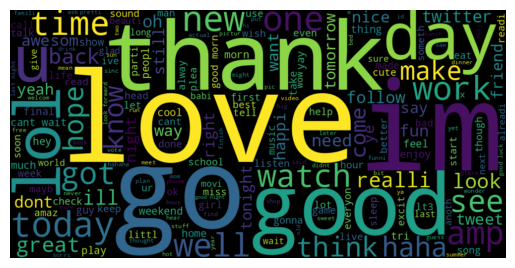

In [ ]:
# Plot the positive tweets word cloud. Create a list of words by iterating through the positive tweets filtered,
# split the words and insert only words that are not stop words into the list. Generate a word cloud from the list of words generated.

positive_words = []
for i in positive_tweets['tweet']:
    positive_words.extend([word for word in i.split() if word not in STOPWORDS])

wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(positive_words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

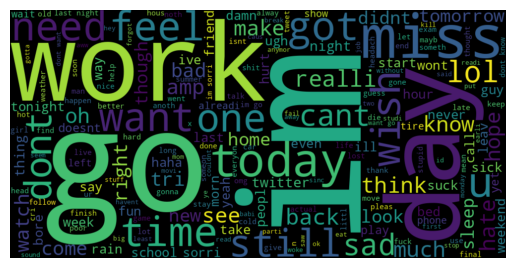

In [ ]:
# Plot the negative tweets word cloud. Create a list of words by iterating through the negative tweets filtered,
# split the words and insert only words that are not stop words into the list. Generate a word cloud from the list of words generated.

# Update stop words with words in the Positive word cloud to remove them from the negative word cloud
stopwords = set(STOPWORDS)
stopwords.update(["well", "love","good","great"])

# Plot the negative tweets word cloud
neg_words = " ".join(i for i in negative_tweets.tweet)
wordcloud = WordCloud(stopwords=stopwords, width = 1000, height = 500).generate(neg_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Plot Sentiments Distribution of the tweets dataset

# Encode the sentiments  1 for positive sentiments and other than 1 for negative
tweets['Sentiment_tweets'] = np.where(tweets['sentiment'] == 1, 'Positive', 'Negative')

fig = px.histogram(tweets, x="Sentiment_tweets")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.0)
fig.update_layout(title_text='Sentiments Distribution of the tweets dataset', width=600, height=500)
fig.show()

In [ ]:
# Using textblob, get actual tweets polarity of the tweets.

# Create a list of all tweets in the dataset
tweets_list = tweets['tweet'].to_list()

# Define the sentiment objects using TextBlob
sentiment_objects = [TextBlob(tweet) for tweet in tweets_list]

# Create a list of polarity values and tweet text
sentiment_data = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

# Create a dataframe of each tweet against its polarity
sentiment_tweet = pd.DataFrame(sentiment_data, columns=["polarity", "tweet"])

# Define our polarity rate using if statement
def  definepolarity(x):
  if x > 0.05:
    return "Positive"
  elif x < -0.05:
    return "Negative"
  elif x < 0.05 and x > -0.05:
    return "Neutral"

# Classify the sentiments using function defined above
sentiment_tweet["Sentiment"] = sentiment_tweet["polarity"].apply(definepolarity)


In [ ]:
# Make a plot of polarity distribution of the tweets

fig = px.histogram(sentiment_tweet, x="Sentiment")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.0)
fig.update_layout(title_text='Polarity Distribution of the tweets dataset', width=600, height=500)
fig.show()

## Modelling

In [ ]:
# Import useful libraries

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
# Extract the input and output column

X = tweets['tweet']
y = tweets['sentiment']

In [ ]:
# Vectorize the tweets (X)

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
X = vectorizer.fit_transform(X)

In [ ]:
# Split the dataset into train and test, using 70% for training and 30% for test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Hyperparameters Tuning

In [ ]:
#  # Define the classification models and Hyperparameters tuning. Pass a range of arguments to the models and fit the model to get the best parameter for building the model.

# SVM
# Define the range of the chosen parameters, the parameters were tested on a list

# sv_param_grid = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']}

# SVM = GridSearchCV(SVC(), param_grid=sv_param_grid, refit = True, verbose = 3)
# SVM.fit(X_train, y_train)
#print(SVM.best_params_)


#/------------------------------------------------------------------------------------------------------------------------------------------/
# RandomForestClassifier
# rf_param_grid = {
#     'n_estimators': [25, 50, 100, 150],
#     'max_features': ['sqrt', 'log2', None],
#     'max_depth': [3, 6, 9],
#     'max_leaf_nodes': [3, 6, 9],
# }

# RF = GridSearchCV(RandomForestClassifier(),
#                            param_grid = rf_param_grid)
# RF.fit(X_train, y_train)
# print(RF.best_estimator_)


#/------------------------------------------------------------------------------------------------------------------------------------------/
# Decison Tree
# param_dist = {
#     "max_depth": [5, None],
#     "max_features": randint(1, 20),
#     "min_samples_leaf": randint(1, 20),
#     "criterion": ["gini", "entropy"]
# }

# DT = RandomizedSearchCV(DecisionTreeClassifier(), param_dist, cv=5)
# DT.fit(X, y)

# print("Decision Tree Best Parameters: {}".format(DT.best_params_))
# print("Best score is {}".format(DT.best_score_))


#/------------------------------------------------------------------------------------------------------------------------------------------/
# Logistic Regression
# c_space = np.logspace(-5, 8, 15)
# param_grid = {'C': c_space}

# # Instantiating the GridSearchCV object
# LR = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=5000), param_grid, cv=5)

# # Assuming X and y are your feature matrix and target variable
# # Fit the GridSearchCV object to the data
# LR.fit(X, y)

# # Print the tuned parameters and score
# print("Tuned Logistic Regression Parameters: {}".format(LR.best_params_))
# print("Best score is {}".format(LR.best_score_))

#/------------------------------------------------------------------------------------------------------------------------------------------/
# K NeighborsClassifier
# k_range = list(range(1, 31))
# param_grid = dict(n_neighbors=k_range)

# # defining parameter range
# KNN = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

# # Fit the model created
# grid_search = KNN.fit(X, y)
# print(grid_search.best_params_)

### Hyperparameters Tuning Report

Hyperparameter tuning was done using the code above to find the best-performing parameters for building the different models used. This was done by defining the grid for each of the models used and setting varying parameters.

The results of tuning for each of the models are as follows;
* Support Vector Machine: {'C': 1, 'gamma': 0.1, 'kernel':'rbf'}

* Random Forest Classifier: {'max_depth':9, 'max_leaf_nodes':9, 'n_estimators':150}

* Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 1}

* Logistic Regression: {'C': 0.4393970560760795}

* Kneighbos Classifier: {'n_neighbors': 7}





In [ ]:
# Define the function for printing the evaluation metrics
# This function takes the confusion matrix (cm) from the cell below and produces the evaluation metrics

def confusion_metrics (conf_matrix):

    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)

    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy

    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))

    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}')
    print(f'Mis-Classification: {round(conf_misclassification,2)}')
    print(f'Sensitivity: {round(conf_sensitivity,2)}')
    print(f'Specificity: {round(conf_specificity,2)}')
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

##  Support Vector Machines (SVM)

SVM metrics

True Positives: 2366
True Negatives: 1997
False Positives: 985
False Negatives: 652
--------------------------------------------------
Accuracy: 0.73
Mis-Classification: 0.27
Sensitivity: 0.78
Specificity: 0.67
Precision: 0.67
f_1 Score: 0.72


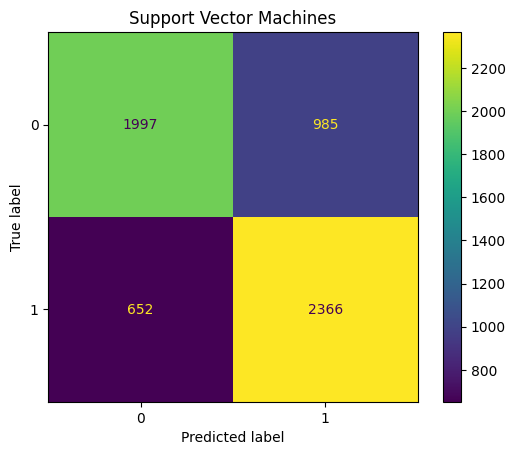

In [ ]:
# Define the classification models using the best parameters found from cross-validation
SVM = svm.SVC(C = 1, gamma = 0.1, kernel ='rbf')

#  Train the models
SVM.fit(X_train, y_train)

# Predict using the built model and test data
y_pred1=SVM.predict(X_test)

# Print the evaluation metrics for SVM
cm1 = confusion_matrix(y_test, y_pred1, labels=SVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=SVM.classes_)
disp.plot()

# Plot the confusion matrix
plt.title("Support Vector Machines")
print('SVM metrics\n')
confusion_metrics(cm1)

# Random Forest Classifier (RF)

RF metrics

True Positives: 2295
True Negatives: 1980
False Positives: 1002
False Negatives: 723
--------------------------------------------------
Accuracy: 0.71
Mis-Classification: 0.29
Sensitivity: 0.76
Specificity: 0.66
Precision: 0.66
f_1 Score: 0.71


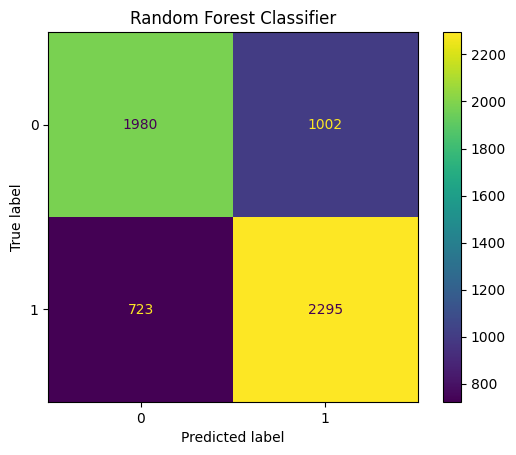

In [ ]:
#  Train the models the hyperparameters
RF = RandomForestClassifier(max_depth=9, max_leaf_nodes=9, n_estimators=150)
RF.fit(X_train, y_train)

# Predict the test data
y_pred2=RF.predict(X_test)

# Print the evaluation metrics for RF
cm2 = confusion_matrix(y_test, y_pred2, labels=RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=RF.classes_)
disp.plot()
plt.title("Random Forest Classifier")

# Plot the confusion matrix
print('RF metrics\n')
confusion_metrics(cm2)

## K-Nearest Neighbor(KNN) Algorithm

KNN metrics

True Positives: 1967
True Negatives: 1849
False Positives: 1133
False Negatives: 1051
--------------------------------------------------
Accuracy: 0.64
Mis-Classification: 0.36
Sensitivity: 0.65
Specificity: 0.62
Precision: 0.62
f_1 Score: 0.64


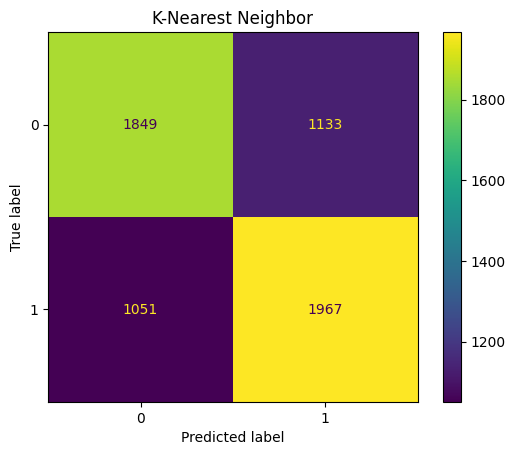

In [ ]:
#  Train the models the hyperparameters
KNN = KNeighborsClassifier(n_neighbors= 7)
KNN.fit(X_train, y_train)

# Predict the test data
y_pred3=KNN.predict(X_test)

# Print the evaluation metrics for KNN
cm3 = confusion_matrix(y_test, y_pred3, labels = KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=KNN.classes_)
disp.plot()
plt.title("K-Nearest Neighbor")

# Plot the confusion matrix
print('KNN metrics\n')
confusion_metrics(cm3)

## Decision Tree (DT)

DT metrics

True Positives: 1878
True Negatives: 1786
False Positives: 1196
False Negatives: 1140
--------------------------------------------------
Accuracy: 0.61
Mis-Classification: 0.39
Sensitivity: 0.62
Specificity: 0.6
Precision: 0.6
f_1 Score: 0.61


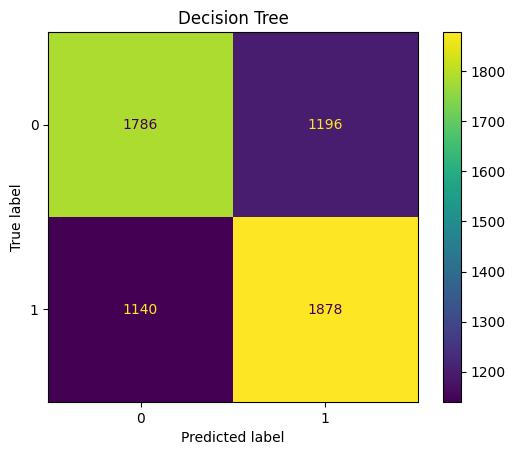

In [ ]:
#  Train and fit the models the hyperparameters
DT = DecisionTreeClassifier(criterion= 'entropy', max_depth= None, max_features= 4, min_samples_leaf= 1)
DT.fit(X_train, y_train)

# Predict the test data
y_pred4=DT.predict(X_test)


# Print the evaluation metrics for DT
cm4 = confusion_matrix(y_test, y_pred4, labels = DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm4,display_labels=DT.classes_)
disp.plot()
plt.title("Decision Tree")

# Plot the confusion matrix
print('DT metrics\n')
confusion_metrics(cm4)

## Logistic Regression (LR)

LR metrics

True Positives: 2320
True Negatives: 2037
False Positives: 945
False Negatives: 698
--------------------------------------------------
Accuracy: 0.73
Mis-Classification: 0.27
Sensitivity: 0.77
Specificity: 0.68
Precision: 0.68
f_1 Score: 0.72


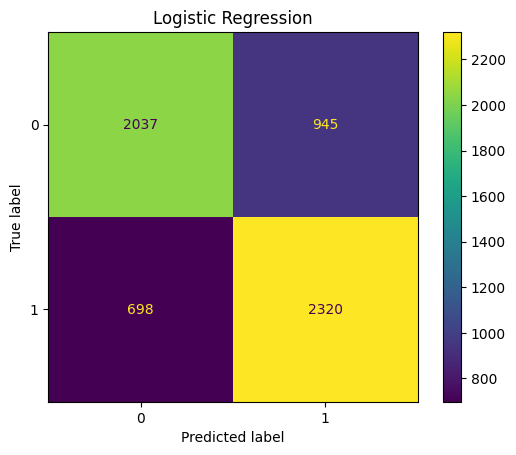

In [ ]:
#  Train and fit the models the hyperparameters
LR = LogisticRegression(C = 0.4393970560760795)
LR.fit(X_train,y_train)

# Predict the test data
y_pred5=LR.predict(X_test)


# Print the evaluation metrics for LR
cm5 = confusion_matrix(y_test, y_pred5, labels = LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm5,display_labels=LR.classes_)
disp.plot()
plt.title("Logistic Regression")

# Plot the confusion matrix
print('LR metrics\n')
confusion_metrics(cm5)


## Gaussian Naive Bayes (NB)

NB metrics

True Positives: 621
True Negatives: 2576
False Positives: 406
False Negatives: 2397
--------------------------------------------------
Accuracy: 0.53
Mis-Classification: 0.47
Sensitivity: 0.21
Specificity: 0.86
Precision: 0.86
f_1 Score: 0.33


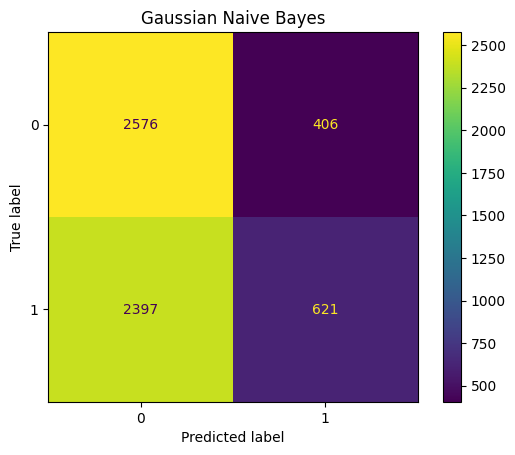

In [ ]:
#  Train the models the hyperparameters
NB = GaussianNB()
NB.fit(X_train.toarray(),y_train)

# Predict the test data
y_pred6 = NB.predict(X_test.toarray())

# Print the evaluation metrics for NB
cm6 = confusion_matrix(y_test, y_pred6, labels = NB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm6,display_labels=NB.classes_)
disp.plot()
plt.title("Gaussian Naive Bayes")

# Plot the confusion matrix
print('NB metrics\n')
confusion_metrics(cm6)




## Report:
**Data Cleaning:** To set the tweets dataset up for sentiment analysis and classification using the six classifiers, the data was cleaned to ensure there were no null values, punctuations, and stop words. Some of the data cleaning methods applied to the dataset include:

1. **Lower text:** The .lower() method was applied to the tweets column to reduce the effect of case sensitivity on any text, hence, improving uniformity of words throughout the dataset.

2. **Punctuation removal:** punctuations generally add meaning to the text, however, to improve uniformity, punctuations are removed. By removing all punctuations, the same words are identified and grouped as one, this would not be the same if punctuations were present in some of the words.

3. **Remove Stop words:** Stop words make it more difficult to extract meaningful information from the tweet dataset during sentiment analysis. They also add volume to the words to be processed. The stop words were removed to remove the noise on the data and focus on meaningful information.
4. **Stemming:** The stemming method was applied to the dataset to change words to their root word. This helps to convert different variances of a word to the root word helping to reduce noise and variance of the same word.

**Visualization:** The tweets dataset was used visualized before classification to better understand the data and gain insights.
1. **Word Cloud**: A general word cloud was plotted to see the most frequent words in the dataset. The tweets dataset was also divided into positive and negative tweets and plotted using the word cloud to identify the most common positive and negative words in the tweets.

2. **Distribution:** The sentiment distributeon of the tweets was plotted and it showed an almost equal number of negative and positive tweets. However, using textblob to get the actual polarity of the tweet showed that most of the tweets were neutral, followed by positive tweets and then negative tweets.

**Classification:** The tweets were classified using 6 classification algorithms outlined below.

* Support Vector Machines (SVM): The model has an accuracy of 73% and an error rate of 27%. The model also identifies true positives correctly 78% of the time (0.78 sensitivity or true positive rate). By the precision (0.67), there is a 67% chance that the model’s positive prediction is correct.

* Random Forest Classifier (RF): The model had 71% of the total predictions correct (accuracy). An error Rate of 0.29 shows that 29% of predictions were wrong. The model correctly predicted actual positives 76% of the time (recall rate or sensitivity), and correctly predicted actual negatives 66% of the time (specificity).

* K-Nearest Neighbor(KNN) Algorithm: The model has an accuracy of 64% for all predictions. It had a mis-Classification of 36%, meaning 36% of the classification was incorrect. The F1 Score of 64% shows the overall performance of the model (mean of Precision and Sensitivity).

* Decision Tree (DT): 61% of the predictions for this model were correct. It has an error rate of 39% (wrong predictions). By the precision (0.6), there is a 60% chance that the model’s positive prediction is correct.

* Logistic Regression (LR): The model has an accuracy of 73% and a misclassification of 27% (wrong predictions). The model rightly classified actual positives correctly 77% of the time (sensitivity) and rightly classified actual negatives correctly 68% of the time (specificity). The F1 Score of 72% shows the overall performance of the model.

* Gaussian Naive Bayes (NB): The model has an accuracy of 53%. This means that the model has a hard time classifying tweets correctly and a misclassification of 47%. It has a sensitivity of 21% and a specificity of 86%. The low F1-Score shows the combined average of precision and recall, indicating a moderate performance of the model.








